In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import boston_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

2025-05-08 17:49:10.507817: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-08 17:49:10.544755: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-05-08 17:49:10.544961: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-05-08 17:49:10.546466: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-08 17:49:10.553333: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-08 17:49:10.554406: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [2]:
# Load the Boston Housing dataset from Keras
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

In [3]:
# Create feature names (as per the original dataset)
feature_names = [
    'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE',
    'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'
]

In [4]:
train_df = pd.DataFrame(X_train, columns=feature_names)
train_df['PRICE'] = y_train

test_df = pd.DataFrame(X_test, columns=feature_names)
test_df['PRICE'] = y_test

In [5]:
# Display dataset information
print("Training set shape:", train_df.shape)
print("Test set shape:", test_df.shape)
print("\nFirst 5 rows of training data:")
train_df.head()

Training set shape: (404, 14)
Test set shape: (102, 14)

First 5 rows of training data:


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,1.23247,0.0,8.14,0.0,0.538,6.142,91.7,3.9769,4.0,307.0,21.0,396.90,18.72,15.2
1,0.02177,82.5,2.03,0.0,0.415,7.610,15.7,6.2700,2.0,348.0,14.7,395.38,3.11,42.3
2,4.89822,0.0,18.10,0.0,0.631,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26,50.0
3,0.03961,0.0,5.19,0.0,0.515,6.037,34.5,5.9853,5.0,224.0,20.2,396.90,8.01,21.1
4,3.69311,0.0,18.10,0.0,0.713,6.376,88.4,2.5671,24.0,666.0,20.2,391.43,14.65,17.7


In [6]:
# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")

Training set shape: (404, 13)
Test set shape: (102, 13)


In [8]:
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation='relu', input_shape=[X_train.shape[1]]),
        layers.Dense(32, activation='relu'),
        layers.Dense(1)  # Linear activation for regression
    ])

    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

    model.compile(
        loss='mse',  # Mean squared error for regression
        optimizer=optimizer,
        metrics=['mae', 'mse']  # Mean absolute error and mean squared error
    )
    return model

model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                896       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3009 (11.75 KB)
Trainable params: 3009 (11.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
# Implement early stopping callback
early_stop = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=20,
    verbose=1,
    restore_best_weights=True
)

In [10]:
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=150,
    batch_size=32,
    verbose=1,
    callbacks=[early_stop]
)

Epoch 1/150
11/11 [==============================] - 1s 19ms/step - loss: 563.0160 - mae: 21.9110 - mse: 563.0160 - val_loss: 609.9255 - val_mae: 23.0126 - val_mse: 609.9255
Epoch 2/150
11/11 [==============================] - 0s 4ms/step - loss: 527.6202 - mae: 21.1310 - mse: 527.6202 - val_loss: 571.2724 - val_mae: 22.1809 - val_mse: 571.2724
Epoch 3/150
11/11 [==============================] - 0s 4ms/step - loss: 489.8567 - mae: 20.2437 - mse: 489.8567 - val_loss: 525.2733 - val_mae: 21.1489 - val_mse: 525.2733
Epoch 4/150
11/11 [==============================] - 0s 5ms/step - loss: 441.9646 - mae: 19.0979 - mse: 441.9646 - val_loss: 470.2839 - val_mae: 19.8383 - val_mse: 470.2839
Epoch 5/150
11/11 [==============================] - 0s 4ms/step - loss: 386.8892 - mae: 17.6114 - mse: 386.8892 - val_loss: 401.1141 - val_mae: 18.0519 - val_mse: 401.1141
Epoch 6/150
11/11 [==============================] - 0s 4ms/step - loss: 318.7892 - mae: 15.6740 - mse: 318.7892 - val_loss: 320.2363 

In [11]:
# Save the trained model to an .h5 file
model.save('boston_model.h5')
print("Model saved as boston_model.h5")

Model saved as boston_model.h5
/root/venv/lib/python3.9/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


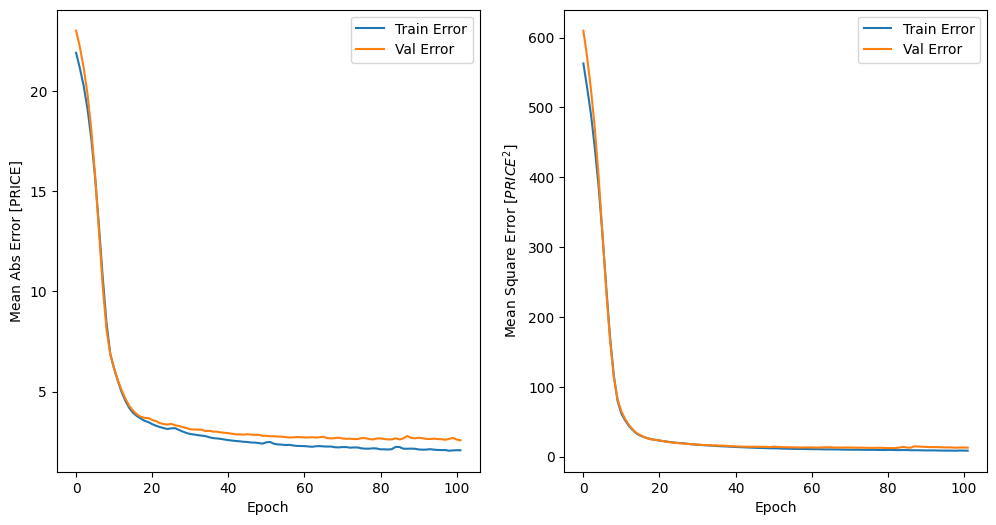

In [12]:
# Plot training history
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error [PRICE]')
    plt.plot(hist['epoch'], hist['mae'], label='Train Error')
    plt.plot(hist['epoch'], hist['val_mae'], label='Val Error')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error [$PRICE^2$]')
    plt.plot(hist['epoch'], hist['mse'], label='Train Error')
    plt.plot(hist['epoch'], hist['val_mse'], label='Val Error')
    plt.legend()

    plt.show()

plot_history(history)

In [13]:
# Evaluate the model on test data
test_predictions = model.predict(X_test).flatten()

print("Test Set Evaluation:")
print(f"Mean Squared Error: {mean_squared_error(y_test, test_predictions):.2f}")
print(f"R-squared Score: {r2_score(y_test, test_predictions):.2f}")

4/4 [==============================] - 0s 2ms/step
Test Set Evaluation:
Mean Squared Error: 24.84
R-squared Score: 0.70


Text(0.5, 1.0, 'True vs Predicted Prices')

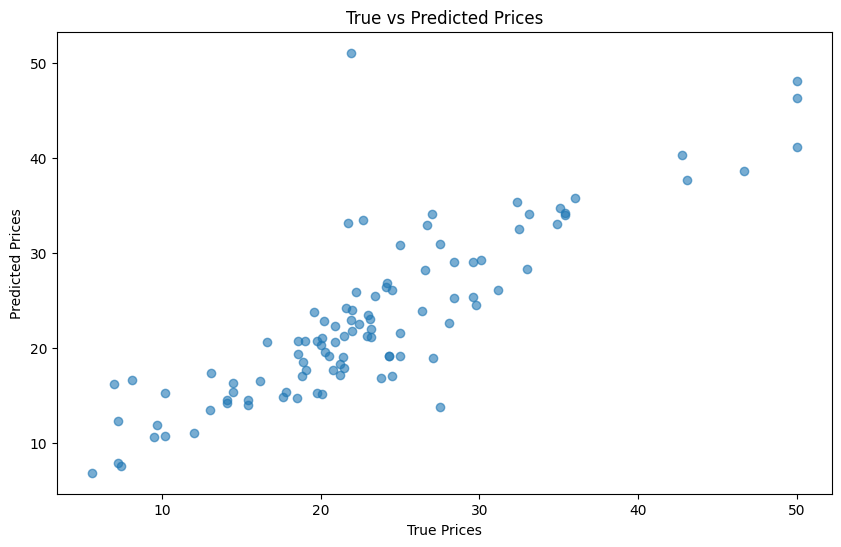

In [14]:
# Plot predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, test_predictions, alpha=0.6)
plt.xlabel('True Prices')
plt.ylabel('Predicted Prices')
plt.title('True vs Predicted Prices')

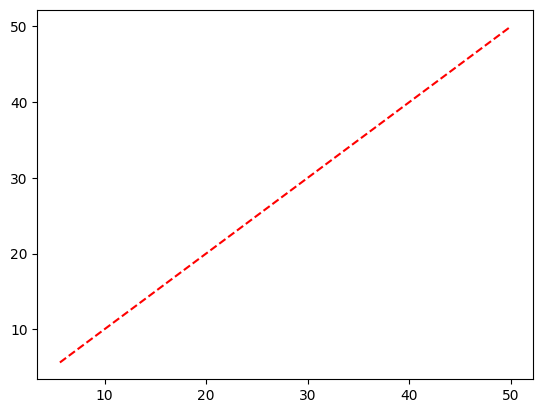

In [15]:
# Plot the perfect prediction line
perfect_line = np.linspace(min(y_test), max(y_test), 100)
plt.plot(perfect_line, perfect_line, 'r--')
plt.show()

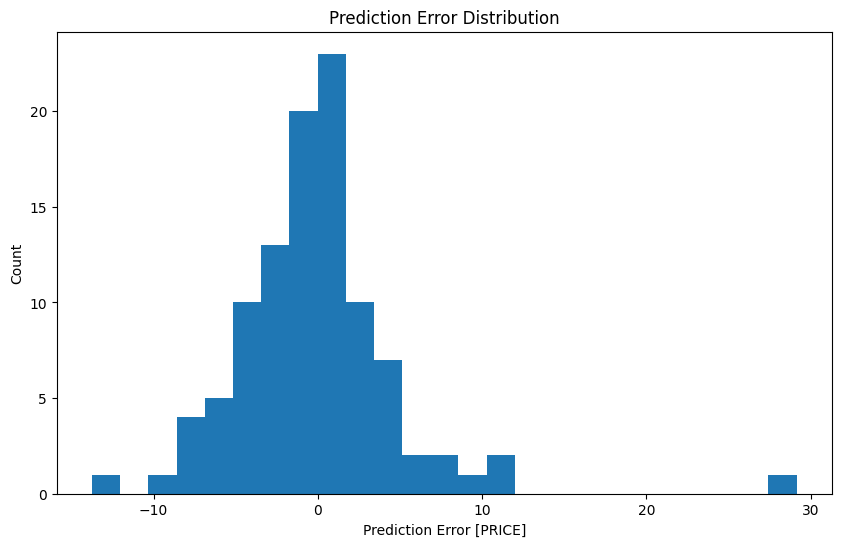

In [16]:
# Display error distribution
error = test_predictions - y_test
plt.figure(figsize=(10, 6))
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [PRICE]')
plt.ylabel('Count')
plt.title('Prediction Error Distribution')
plt.show()

1/1 [==============================] - 0s 14ms/step
/root/venv/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(

Test Case 1:
--------------------------------------------------
Input Features:
CRIM: 0.02731
ZN: 0.0
INDUS: 7.07
CHAS: 0.0
NOX: 0.469
RM: 6.421
AGE: 78.9
DIS: 4.9671
RAD: 2.0
TAX: 242.0
PTRATIO: 17.8
B: 396.9
LSTAT: 9.14

Predicted Price: $24,225.62
Expected Range: $20,000.00 - $25,000.00
✅ Prediction within expected range

Test Case 2:
--------------------------------------------------
Input Features:
CRIM: 0.00632
ZN: 18.0
INDUS: 2.31
CHAS: 0.0
NOX: 0.538
RM: 6.575
AGE: 65.2
DIS: 4.09
RAD: 1.0
TAX: 296.0
PTRATIO: 15.3
B: 396.9
LSTAT: 4.98

Predicted Price: $27,969.98
Expected Range: $15,000.00 - $20,000.00
❌ Prediction outside expected range

Test Case 3:
--------------------------------------------------
Input Features:
CRIM: 0.01501
ZN: 90.0
INDUS: 1.21
CHAS: 0.0
NOX: 

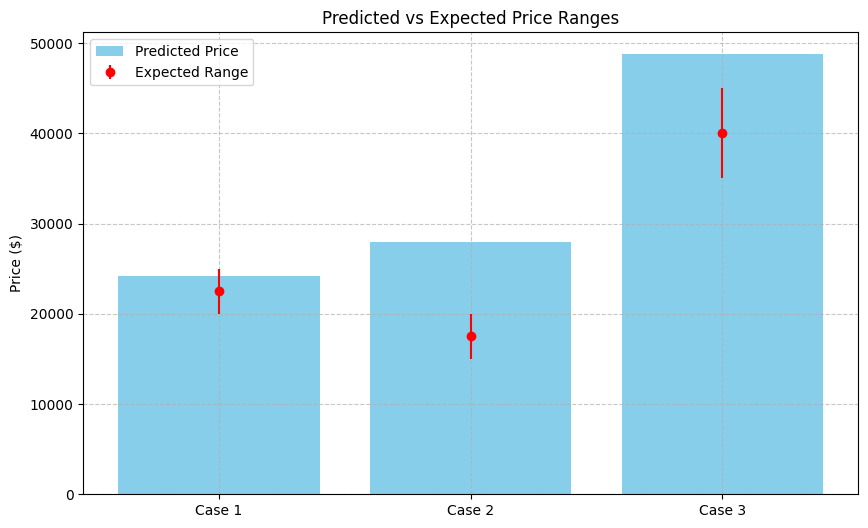

In [17]:
# %% [markdown]
## Model Testing Section

# %%
# Define test cases (using the same feature order as your training data)
test_cases = [
    # Average House
    {
        'CRIM': 0.02731, 'ZN': 0.0, 'INDUS': 7.07, 'CHAS': 0.0, 'NOX': 0.469,
        'RM': 6.421, 'AGE': 78.9, 'DIS': 4.9671, 'RAD': 2.0, 'TAX': 242.0,
        'PTRATIO': 17.8, 'B': 396.90, 'LSTAT': 9.14,
        'expected_range': (20, 25)  # in $1000s
    },
    # Lower-Priced House
    {
        'CRIM': 0.00632, 'ZN': 18.0, 'INDUS': 2.31, 'CHAS': 0.0, 'NOX': 0.538,
        'RM': 6.575, 'AGE': 65.2, 'DIS': 4.0900, 'RAD': 1.0, 'TAX': 296.0,
        'PTRATIO': 15.3, 'B': 396.90, 'LSTAT': 4.98,
        'expected_range': (15, 20)
    },
    # Higher-Priced House
    {
        'CRIM': 0.01501, 'ZN': 90.0, 'INDUS': 1.21, 'CHAS': 0.0, 'NOX': 0.401,
        'RM': 7.923, 'AGE': 24.8, 'DIS': 5.885, 'RAD': 1.0, 'TAX': 198.0,
        'PTRATIO': 13.6, 'B': 395.52, 'LSTAT': 3.16,
        'expected_range': (35, 45)
    }
]

# %%
# Convert test cases to DataFrame and scale features
test_df = pd.DataFrame(test_cases).drop('expected_range', axis=1)
scaled_test_data = scaler.transform(test_df)  # Use the same scaler from training

# Make predictions
predictions = model.predict(scaled_test_data)

# Display results
for i, (test_case, prediction) in enumerate(zip(test_cases, predictions)):
    price_in_k = prediction[0]
    expected_min, expected_max = test_case['expected_range']

    print(f"\nTest Case {i+1}:")
    print("-" * 50)
    print(f"Input Features:")
    for feature, value in test_case.items():
        if feature != 'expected_range':
            print(f"{feature}: {value}")

    print(f"\nPredicted Price: ${price_in_k * 1000:,.2f}")
    print(f"Expected Range: ${expected_min * 1000:,.2f} - ${expected_max * 1000:,.2f}")

    if expected_min <= price_in_k <= expected_max:
        print("✅ Prediction within expected range")
    else:
        print("❌ Prediction outside expected range")

# %%
# Visualize test predictions
plt.figure(figsize=(10, 6))
x = range(len(test_cases))
pred_prices = [p[0] * 1000 for p in predictions]
expected_mins = [tc['expected_range'][0] * 1000 for tc in test_cases]
expected_maxs = [tc['expected_range'][1] * 1000 for tc in test_cases]

plt.bar(x, pred_prices, color='skyblue', label='Predicted Price')
plt.errorbar(x,
             [(min+max)/2 for min, max in zip(expected_mins, expected_maxs)],
             yerr=[(max-min)/2 for min, max in zip(expected_mins, expected_maxs)],
             fmt='o', color='r', label='Expected Range')

plt.xticks(x, [f'Case {i+1}' for i in range(len(test_cases))])
plt.ylabel('Price ($)')
plt.title('Predicted vs Expected Price Ranges')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=d8365eab-db7b-47eb-a47e-443fcca51d5c' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>